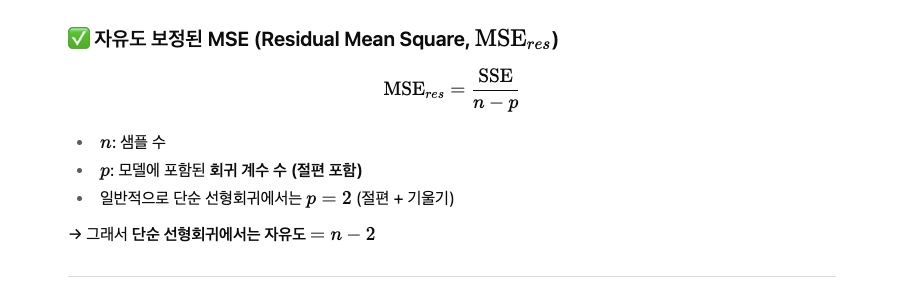

In [2]:
import numpy as np 
import pandas as pd
house=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv")
house=house[["price","sqft_living"]]
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


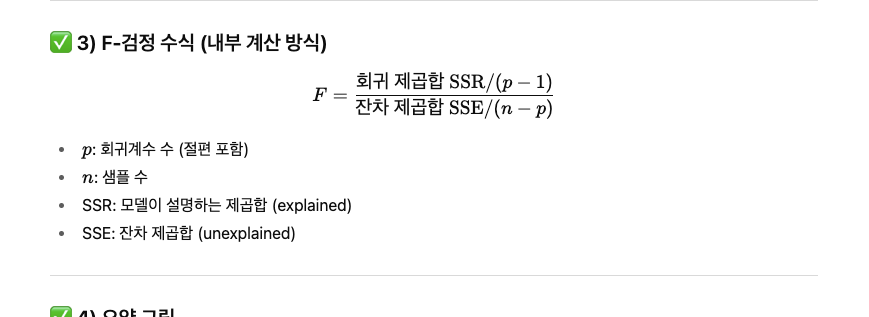

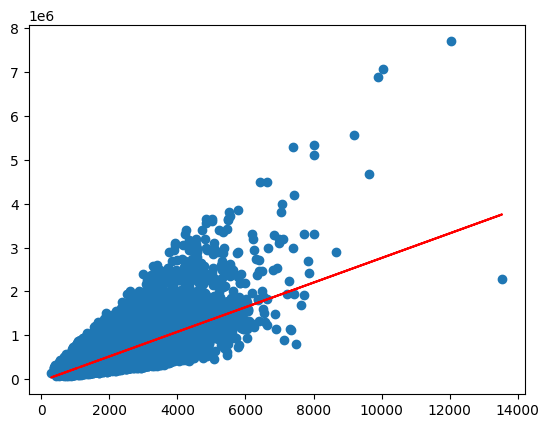

In [4]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

X=house[['sqft_living']]
y=house['price']
lr=ols("price~sqft_living",data=house).fit()
y_pred=lr.predict()
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.show()

In [5]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:31:14   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

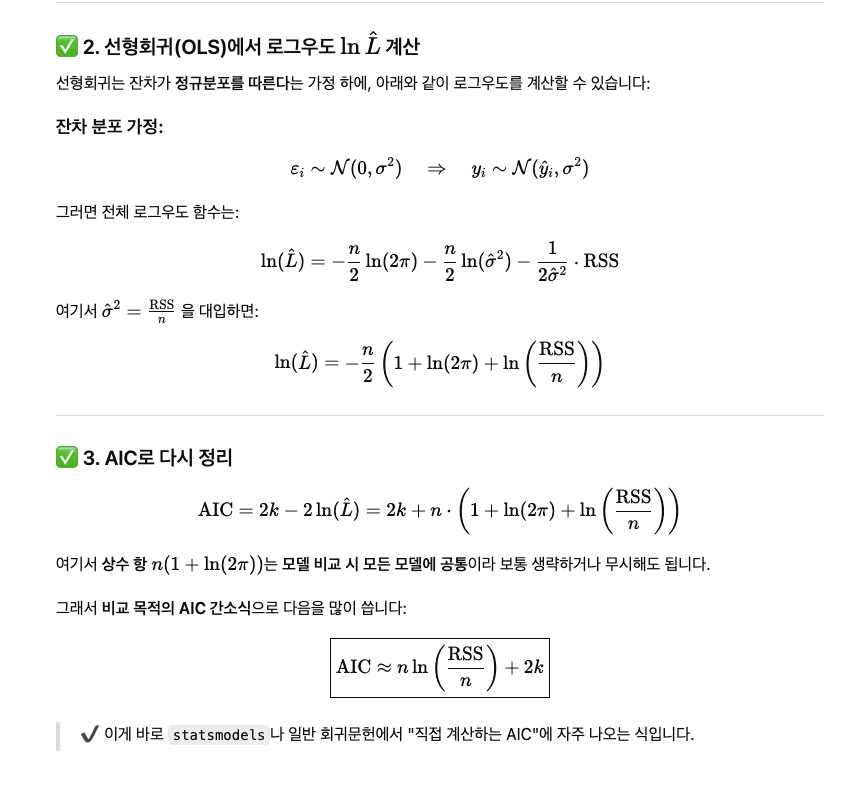

In [9]:
# 직접 AIC 계산
n = lr.nobs
rss = np.sum(lr.resid ** 2)
k = lr.df_model + 1  # +1 for intercept

aic_manual = n * np.log(rss / n) + 2 * k

print("Manual AIC:", aic_manual)
print("Model AIC :", lr.aic)

Manual AIC: 539203.5295452357
Model AIC : 600538.5665815409


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns #다변량에서 ㄱ
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [10]:
import pandas as pd
Cars=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv")
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Cars.columns=Cars.columns.str.replace(".","")
model=smf.ols(formula="Price~EngineSize+RPM+Weight+Length+MPGcity+MPGhighway",data=Cars)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           4.88e-14
Time:                        18:41:16   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
Cars[["EngineSize","RPM","Weight","Length","MPGcity","MPGhighway"]].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [18]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X=dmatrices("Price~EngineSize+RPM+Weight+Length+MPGcity+MPGhighway",data=Cars,return_type="dataframe")
vif_list=[]
for i in range(1,len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values,i),X.columns[i]])
pd.DataFrame(vif_list,columns=['vif','variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [20]:
X.columns

Index(['Intercept', 'EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity',
       'MPGhighway'],
      dtype='object')

In [22]:
model = smf.ols(formula="Price~EngineSize+RPM+Weight+Length+MPGhighway", data=Cars)
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.28e-14
Time:                        19:12:01   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
import time
import itertools
import warnings
warnings.filterwarnings('ignore')
def processSubset(X,y,feature_set):
    model= sm.OLS(y,X[list(feature_set)])
    regr=model.fit()
    AIC=regr.aic
    return {'model':regr,"AIC":AIC}

def forward(X,y, predictors):
    remaining_predictors=[p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results=[]
    for p in remaining_predictors:
        results.append(processSubset(X,y,predictors+[p]+['Intercept']))
    models=pd.DataFrame(results)
    best_model=models.loc[models['AIC'].argmin()]
    print("Processed",models.shape[0],"model on",len(predictors)+1, "predictors in")
    print("Selected Predictors",best_model['model'].model.exog_names,"AIC",best_model[0].aic)
    return best_model

def backward(X,y,predictors):
    tic= time.time()
    results=[]
    for combo in itertools.combinations(predictors,len(predictors)-1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['Intercept']))
    models=pd.DataFrame(results)
    best_model=models.loc[models['AIC'].argmin()]
    print("Processed",models.shape[0],"model on",len(predictors)+1, "predictors in")
    print("Selected Predictors",best_model['model'].model.exog_names,"AIC",best_model[0].aic)
    return best_model

def Stepwise_model(X,y):
    Stepmodels=pd.DataFrame(columns=['AIC','model'])
    tic=time.time()
    predictors=[]
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']
    for i in range(1,len(X.columns.difference(['Intercept']))+1):
        Forward_result=forward(X,y,predictors)
        print('forward')
        Stepmodels.loc[i]=Forward_result
        predictors=Stepmodels.loc[i]["model"].model.exog_names
        predictors=[k for k in predictors if k!="Intercept"]
        Backward_result=backward(X,y,predictors)
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i]=Backward_result
            predictors=Stepmodels.loc[i]["model"].model.exog_names
            predictors=[k for k in predictors if k!="Intercept"]
            print('backward')
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else:
            Smodel_before=Stepmodels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time",(toc-tic),"seconds")
    return Stepmodels['model'][len(Stepmodels['model'])]

In [37]:
Stepwise_best_model=Stepwise_model(X,y)

Processed 6 model on 1 predictors in
Selected Predictors ['Weight', 'Intercept'] AIC 638.2790669305498
forward
Processed 1 model on 2 predictors in
Selected Predictors ['Intercept'] AIC 686.7529864151061
Processed 5 model on 2 predictors in
Selected Predictors ['Weight', 'RPM', 'Intercept'] AIC 624.5241529342444
forward
Processed 2 model on 3 predictors in
Selected Predictors ['Weight', 'Intercept'] AIC 638.2790669305498
Processed 4 model on 3 predictors in
Selected Predictors ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC 616.0976497740975
forward
Processed 3 model on 4 predictors in
Selected Predictors ['Weight', 'RPM', 'Intercept'] AIC 624.5241529342444
Processed 3 model on 4 predictors in
Selected Predictors ['Weight', 'RPM', 'EngineSize', 'MPGcity', 'Intercept'] AIC 616.1664162275082
forward
Processed 4 model on 5 predictors in
Selected Predictors ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC 616.0976497740975
backward
Processed 3 model on 4 predictors in
Selected Predictors 

In [38]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           6.75e-16
Time:                        19:51:17   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""